In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib 

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_excel("ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
#renaming columns

column_names = {"X1":'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution', "Y1": 'Heating_Load', "Y2": 'Cooling_Load'}

df.rename(columns=column_names, inplace=True)
df.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [19]:
# selecting a part for plotting

Selected = df[["Relative_Compactness", "Cooling_Load"]].sample(20, random_state=10)

print(Selected)

     Relative_Compactness  Cooling_Load
568                  0.64         22.72
620                  0.62         17.36
456                  0.74         14.92
197                  0.90         33.91
714                  0.64         22.25
27                   0.74         11.17
277                  0.66         14.81
64                   0.79         41.68
720                  0.98         32.88
475                  0.64         19.90
482                  0.98         30.00
555                  0.74         17.25
43                   0.64         16.67
161                  0.79         41.22
400                  0.79         45.13
660                  0.66         17.04
549                  0.76         40.85
273                  0.69         14.28
302                  0.82         27.25
45                   0.62         12.22


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

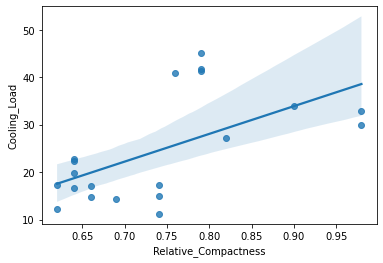

In [20]:
#plotting proper

sns.regplot(x="Relative_Compactness", y="Cooling_Load", 
           data=Selected)

In [21]:
# Measuring regression performance

# Mean Absolute Error

# First, we normalize our data by making sure that 
# all values in a column are integers or floats.
# We do this because, the machine works preferably with digits

#normalizing with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler)

MinMaxScaler()


In [35]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Cooling_Load', 'Heating_Load'])
heating_target = normalised_df['Heating_Load']
cooling_target = normalised_df["Cooling_Load"]
print(normalised_df)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                1.000000      0.000000   0.285714   0.000000             1.0   
1                1.000000      0.000000   0.285714   0.000000             1.0   
2                1.000000      0.000000   0.285714   0.000000             1.0   
3                1.000000      0.000000   0.285714   0.000000             1.0   
4                0.777778      0.166667   0.428571   0.111111             1.0   
..                    ...           ...        ...        ...             ...   
763              0.055556      0.916667   0.571429   1.000000             0.0   
764              0.000000      1.000000   0.714286   1.000000             0.0   
765              0.000000      1.000000   0.714286   1.000000             0.0   
766              0.000000      1.000000   0.714286   1.000000             0.0   
767              0.000000      1.000000   0.714286   1.000000             0.0   

     Orientation  Glazing_A

In [39]:
# Spliting the data into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=.2, random_state=3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fit data to linear model
model.fit(x_train, y_train)

# obtain predictions by testing
predicted_values = model.predict(x_test)
#print(predicted_values)

In [41]:
# checking for errors
# mean_absolute_error and root_mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predicted_values)
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))

print(mae)
print(rmse)

0.05696722964709063
0.0766550269300534


In [45]:
# for residual sum of squares and R-squared errors
from sklearn.metrics import r2_score

rss = np.sum(np.square(y_test-predicted_values))
r2e = r2_score(y_test, predicted_values)

print(round(rss, 4))
print(round(r2e, 3))

5.0723
0.559


In [46]:
# Regularization and Penalization methods
# Ridge regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [48]:
# Lasso regression and feature selection
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=.0001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [52]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')


final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Roof_Area,-3.894073e+12,-0.159859,-0.286314
1,Wall_Area,-3.028724e+12,0.094900,-0.000000
2,Relative_Compactness,-6.465286e-01,-0.313953,-0.415765
3,Orientation,-1.884460e-03,-0.001514,-0.000632
4,Glazing_Area_Distribution,2.870178e-02,0.029281,0.028474
5,Glazing_Area,2.188244e-01,0.216946,0.217816
6,Overall_Height,4.116211e-01,0.462371,0.458974
7,Surface_Area,5.192098e+12,-0.064536,-0.000000
